# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Manthan Patel

Student ID: 1008247933

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [17]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? **30**
* How many observations have a 'mean area' of greater than 700? **171**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [18]:
import pandas as pd
import numpy as np
#Constructing the main data frame df
df = pd.DataFrame(columns=dataset.get('feature_names') , data=dataset.get('data'))
df['target']= dataset.get('target')
print(df)

#Part-1 Answers
print("No. of Features available in dataset are = 30")
print("No. of observations which are greater than 700 are = %.f" % df[df['mean area'] > 700].shape[0])
print("No. of participent tested malignant = %.f" % df[df['target'] == 0].shape[0])
print("No. of participent tested benign = %.f" % df[df['target'] == 1].shape[0])


#Data Split
feature_data = df[df.columns[:30]]
target_data = df.get('target')
print(feature_data)
print(target_data)
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

#Saving copies of traing and test data for standardisation in PART-4
std_feature_train = feature_train.copy()
std_target_train = target_train.copy()
std_feature_test = feature_test.copy()



     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]
No. of Features available in dataset are = 30
No. of observations which are greater than 700 are = 171
No. of participent tested malignant = 212
No

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




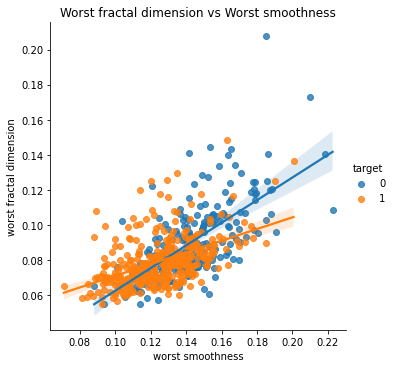

In [19]:
#Plotting the features 
import seaborn as sns
graph = sns.lmplot(x='worst smoothness',y='worst fractal dimension',hue='target',data=df).set(title='Worst fractal dimension vs Worst smoothness')

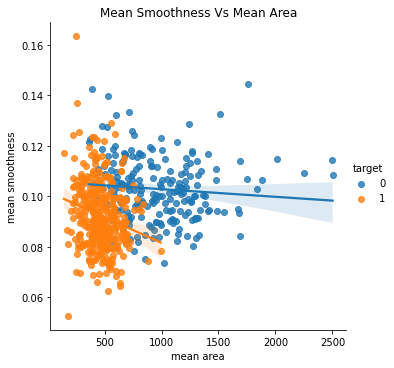

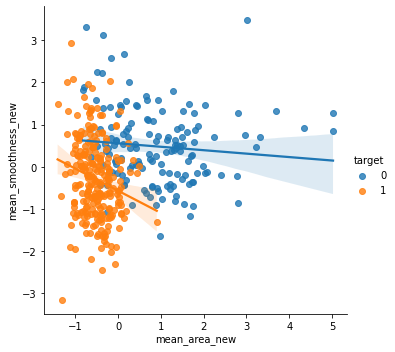

In [20]:
#taking two different features with different scales
graph = sns.lmplot(x='mean area',y='mean smoothness',hue='target',data=df).set(title='Mean Smoothness Vs Mean Area')

#standardising mean area
import numpy as np
mean_area_new = np.array(feature_train.copy()['mean area'])
mean_a = mean_area_new.mean()
sigma_a = mean_area_new.std() 
mean_area_new -= mean_a
mean_area_new /= sigma_a 

#standardising mean smoothness
mean_smoothness_new = np.array(feature_train.copy()['mean smoothness'])
mean_s = mean_smoothness_new.mean()
sigma_s = mean_smoothness_new.std() 
mean_smoothness_new -= mean_s
mean_smoothness_new /= sigma_s 

#Creating new dataframe with scaled features and target & Plotting again
d1 = pd.DataFrame(data = {'mean_smoothness_new': mean_smoothness_new, 'mean_area_new': mean_area_new, 'target':target_train.copy()})
graph_new = sns.lmplot(x='mean_area_new',y='mean_smoothness_new', data=d1, hue = 'target')
#d1.info()

**Observation after changing scales of features:** 
*   Standardisation just changes scale of the graph parameters, it does not have effect on the graph. Like how does the graph looks or different parameters looks.
*   Standardisation can bring two parameters on the same scales on X & Y axis.
*   After scaling when we plot the data, the comparable distance between any two data point will be same as scaling does not reduce the distance between points.



## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




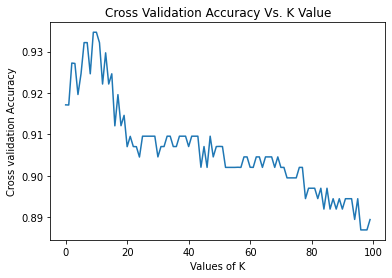

best K value for highest cross validation accuracy =  10
maximum cross validation accuracy =  0.9346518987341772


In [21]:
#Knn neighbours

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
cv_accuracy = []
training_accuracy = []
for i in range(1,101):

  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, feature_train, target_train, cv=5, return_train_score=True)
  cv_accuracy.append(scores['test_score'].mean())
  training_accuracy.append(scores['train_score'].mean())
  #print(Accuracy) 

plt.plot(cv_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Cross validation Accuracy')
plt.title('Cross Validation Accuracy Vs. K Value')
plt.show()
#len(cv_accuracy)

#Max CV Accuracy & Max K value calculation
Full_feat_max_cv = max(cv_accuracy)
max_k = cv_accuracy.index(max(cv_accuracy))
print("best K value for highest cross validation accuracy = " , max_k + 1)
print("maximum cross validation accuracy = " , max(cv_accuracy))

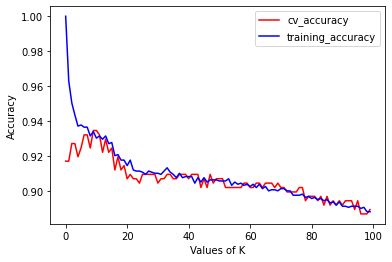

In [22]:
#Plotting Accuracy Vs K value graph for training and CV accuracy
plt.plot(cv_accuracy, 'r',label='cv_accuracy')
plt.plot(training_accuracy, 'b',label='training_accuracy')
plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Observation of Graph:**


*   It is clearly seen that as value of K increases CV Accuracy first increses and later keeps on decreasing. 
*   While Training Accuracy keeps on decreasing with increasing K.


*   Max CV Accuracy is achieved at K=10.



*   For increasing values of K > 10, graph will lead us to an underfitted model where accuracy is much low.
*   For values of K < 10, we can see that Cross validation accuracy is dropping continuously while Training accuracy is getting higher and higher. Because this will be overfitted model as we will have large variance.

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [23]:
#Part-3
from sklearn import tree
from sklearn.model_selection import cross_validate
def Feature_selector (F_train , T_train , tr):
   max_cross_vali = [Full_feat_max_cv] #--------Above calculation for full feature CV accuracy
   Removed_Features = ['Full feature']
   max_k_value= [10] #--------------------------taking value from above for full feature max K value
   no_of_feature = [30]
   new_max_cv = 1
   dt = tree.DecisionTreeClassifier(random_state=2)
   while len(F_train.columns) > 1 and (new_max_cv > tr * Full_feat_max_cv):
            dt.fit(F_train,T_train)
            importance = dt.feature_importances_  
            Removed_Features.append(F_train.columns[np.argmin(importance)])
            F_train = F_train.drop(columns = F_train.columns[np.argmin(importance)])
            Feature_list = F_train.columns
            cross_vali = []
            k_value = []
            for i in range(1,101):
                knn = neighbors.KNeighborsClassifier(n_neighbors=i)
                scores = cross_validate(knn, F_train, T_train, cv=5,return_train_score=True) 
                k_value.append(i)
                cross_vali.append(scores['test_score'].mean())
            new_max_cv=(max(cross_vali))
            max_cross_vali.append(max(cross_vali))
            max_k_value.append(k_value[cross_vali.index(max(cross_vali))])
            no_of_feature.append(len(F_train.columns))
            
            #print("Removed Features=" , Removed_Features, "max cross validation accuracy=", max_cross_vali, "Corresponding K value=", max_k_value)
   return Removed_Features, max_cross_vali, max_k_value, no_of_feature


In [24]:
#Calling Function
Func_call = Feature_selector(feature_train,target_train,0.95)

In [25]:
#Creating dataframe for Returned values
d2= pd.DataFrame(data={'Removed Features':Func_call[0],'Maximum CV Accuracy':Func_call[1],'Maxmimum K value':Func_call[2],'Number of Feature remaining':Func_call[3]})
d2

,Removed Features,Maximum CV Accuracy,Maxmimum K value,Number of Feature remaining
0,Full feature,0.934652,10,30
1,mean radius,0.934652,10,29
2,mean texture,0.934652,10,28
3,mean perimeter,0.932152,7,27
4,mean area,0.914589,34,26
5,mean smoothness,0.914589,34,25
6,mean compactness,0.914589,34,24
7,mean concavity,0.914589,34,23
8,mean fractal dimension,0.914589,34,22
9,radius error,0.914589,34,21


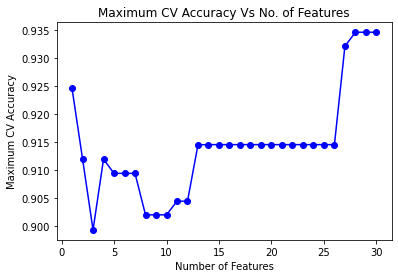

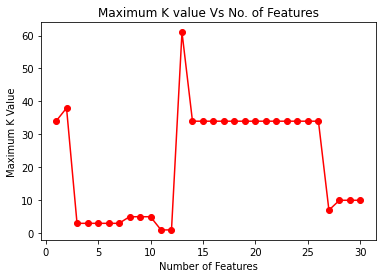

In [26]:
#Plotting No. of Features Vs Mean cross validation Accuracy
plt.plot(Func_call[3], Func_call[1],color='blue',marker='o')
plt.title('Maximum CV Accuracy Vs No. of Features')
plt.xlabel('Number of Features')
plt.ylabel('Maximum CV Accuracy')
plt.show()

#Plotting No. of Features Vs Mmaximum K value
plt.plot(Func_call[3],Func_call[2],color='red',marker='o')
plt.title('Maximum K value Vs No. of Features')
plt.xlabel('Number of Features')
plt.ylabel('Maximum K Value')
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [27]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()
std_feature_train_scaled = pd.DataFrame(scaler.fit_transform(std_feature_train),columns = std_feature_train.columns)
std_feature_test_scaled = pd.DataFrame(scaler.transform(std_feature_test),columns = std_feature_test.columns)

#Running function for standardised data
Std_func_call = Feature_selector(std_feature_train_scaled,target_train,0.95)

In [28]:
d3= pd.DataFrame(data={'Removed Features':Std_func_call[0],'Maximum CV Accuracy':Std_func_call[1],'Maximum K value':Std_func_call[2],'Number of Feature remaining':Std_func_call[3]})
d3

,Removed Features,Maximum CV Accuracy,Maximum K value,Number of Feature remaining
0,Full feature,0.934652,10,30
1,mean radius,0.964968,8,29
2,mean texture,0.962342,4,28
3,mean perimeter,0.959842,8,27
4,mean area,0.959842,8,26
5,mean smoothness,0.957247,5,25
6,mean compactness,0.962342,7,24
7,mean concavity,0.957310,7,23
8,mean fractal dimension,0.959778,5,22
9,radius error,0.957278,5,21


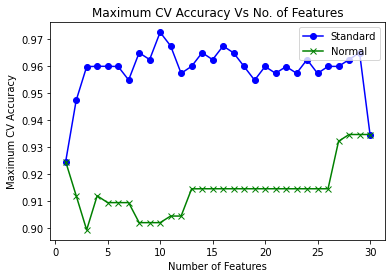

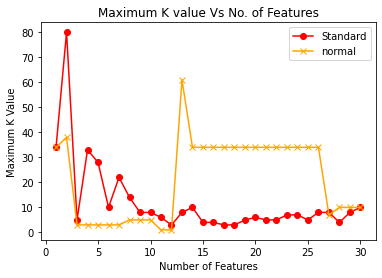

In [29]:
#Plotting No. of Features Vs Mean cross validation Accuracy
plt.plot(Std_func_call[3], Std_func_call[1],color='blue',marker='o',label='Standard')
plt.plot(Func_call[3], Func_call[1],color='green',marker='x',label='Normal')
plt.title('Maximum CV Accuracy Vs No. of Features')
plt.xlabel('Number of Features')
plt.ylabel('Maximum CV Accuracy')
plt.legend(loc='upper right')
plt.show()

#Plotting No. of Features Vs Maximum K value
plt.plot(Std_func_call[3],Std_func_call[2],color='red',marker='o',label='Standard')
plt.plot(Func_call[3],Func_call[2],color='orange',marker='x',label='normal')
plt.title('Maximum K value Vs No. of Features')
plt.xlabel('Number of Features')
plt.ylabel('Maximum K Value')
plt.legend()
plt.show()

In [30]:
#Returning List of features at which max CV was achieved
index = Std_func_call[1].index(max(Std_func_call[1]))
FeatureList_final = np.array(Std_func_call[0])[index:]
Kneighbors_final= Std_func_call[2][index]
print("K neighbors final:", Kneighbors_final)
print("Number of final features:",len(FeatureList_final))
print("Final feature list:", FeatureList_final)

K neighbors final: 8
Number of final features: 10
Final feature list: ['worst compactness' 'mean concave points' 'worst fractal dimension'
 'worst texture' 'mean symmetry' 'fractal dimension error'
 'worst symmetry' 'worst concavity' 'area error' 'worst radius']


**Benefits of Data Stadardisation**


*   As we can see from graph that after stadardisation of data Maximum cross validation accuracy increases, it achieves more accuracy than non-stadardised data.
*   After standardisation data is rescaled so it removes any available bias from model.

*   It makes it easy to do statastical analysis over standardised data.

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=Kneighbors_final)

# Fit the model to our training data
model.fit(std_feature_train_scaled,target_train)

# Make predictions
val_predicted = model.predict(std_feature_test_scaled)
score = 100*(1-sum(abs(val_predicted-target_test))/len(val_predicted))
print("KNN Accuracy:", score)

#Result
print("After applyting dataset to the model with highest CV accuracy we have receive accuracy of ", score, "%")
print("For this model we have taken total %.f features" % len(FeatureList_final))
print("\nThe features which were used to construct the final model are as below")
print("Final feature list:", FeatureList_final)

KNN Accuracy: 95.32163742690058
After applyting dataset to the model with highest CV accuracy we have receive accuracy of  95.32163742690058 %
For this model we have taken total 10 features

The features which were used to construct the final model are as below
Final feature list: ['worst compactness' 'mean concave points' 'worst fractal dimension'
 'worst texture' 'mean symmetry' 'fractal dimension error'
 'worst symmetry' 'worst concavity' 'area error' 'worst radius']


**Results**


*   After standardising the data we have calculated Maximum Cross validation accuracy and important features using feature selector function.
*   This features and corresponding K value was fed in the final model to calculate the prediction accuracy of the model which we are receiving above 90%.

*   From results we can say that our data is neither overfitted nor underfitted.


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/